#### Fashion Mnist dataset

In [1]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

2023-12-08 12:29:17.065770: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def process(x_train, y_train, x_test, y_test):
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    x_train = np.expand_dims(x_train,axis=-1).astype("float32")/255.0
    x_test = np.expand_dims(x_test,axis=-1).astype("float32")/255.0
    return x_train, y_train, x_test, y_test

In [3]:
def my_model():
    model = Sequential()

    model.add(Conv2D(filters=32, padding="same", kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(1/4))
    model.add(Conv2D(filters=12, padding="same", kernel_size=(3,3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(1/4))
    model.add(Conv2D(filters=32, padding="same", kernel_size=(3,3), activation="relu"))
    model.add(Dropout(1/4))
    model.add(Flatten())
    model.add(Dense(units=32, activation="relu"))
    model.add(Dropout(1/4))
    model.add(Dense(units=32, activation="relu"))
    model.add(Dense(units=10, activation="softmax"))

    # compile 
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")
    return model

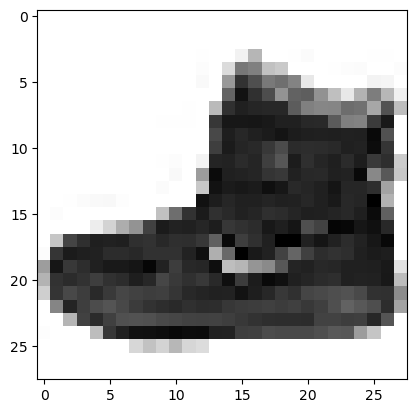

In [4]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train.shape
plt.imshow(x_train[0], cmap="gray_r")

In [5]:

y_tes = y_test.copy()
x_train, y_train, x_test, y_test = process(x_train, y_train, x_test, y_test)

modelconv = my_model()
modelconv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 12)        3468      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 12)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 12)          0

In [6]:
# fit
hist = modelconv.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=128, epochs=50)

Epoch 1/50
469/469 [==============================] - 32s 66ms/step - loss: 0.8929 - accuracy: 0.6544 - val_loss: 0.5513 - val_accuracy: 0.7762
Epoch 2/50
469/469 [==============================] - 32s 69ms/step - loss: 0.6036 - accuracy: 0.7685 - val_loss: 0.4684 - val_accuracy: 0.8221
Epoch 3/50
469/469 [==============================] - 33s 70ms/step - loss: 0.5374 - accuracy: 0.7982 - val_loss: 0.4404 - val_accuracy: 0.8385
Epoch 4/50
469/469 [==============================] - 32s 69ms/step - loss: 0.4944 - accuracy: 0.8148 - val_loss: 0.4013 - val_accuracy: 0.8531
Epoch 5/50
469/469 [==============================] - 32s 69ms/step - loss: 0.4654 - accuracy: 0.8273 - val_loss: 0.3736 - val_accuracy: 0.8655
Epoch 6/50
469/469 [==============================] - 32s 68ms/step - loss: 0.4470 - accuracy: 0.8355 - val_loss: 0.3666 - val_accuracy: 0.8690
Epoch 7/50
469/469 [==============================] - 33s 69ms/step - loss: 0.4214 - accuracy: 0.8438 - val_loss: 0.3411 - val_accuracy:

In [7]:
# prediction
y_conv = modelconv.predict(x_test)


y_conv_c = np.argmax(y_conv, axis=-1)

print(classification_report(y_conv_c, y_tes))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1071
           1       0.98      0.99      0.99       995
           2       0.86      0.85      0.86      1012
           3       0.91      0.91      0.91      1002
           4       0.80      0.87      0.83       923
           5       0.98      0.99      0.99       989
           6       0.73      0.73      0.73       994
           7       0.98      0.94      0.96      1045
           8       0.99      0.99      0.99      1000
           9       0.95      0.98      0.97       969

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



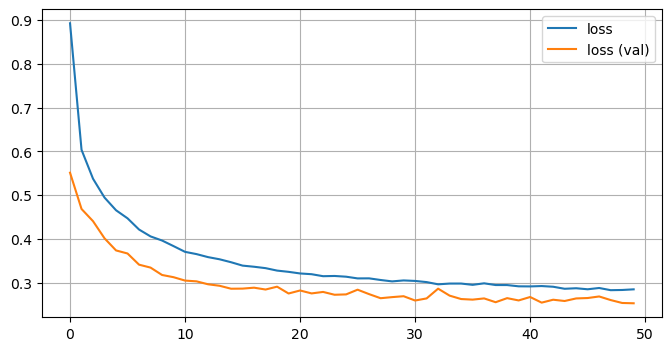

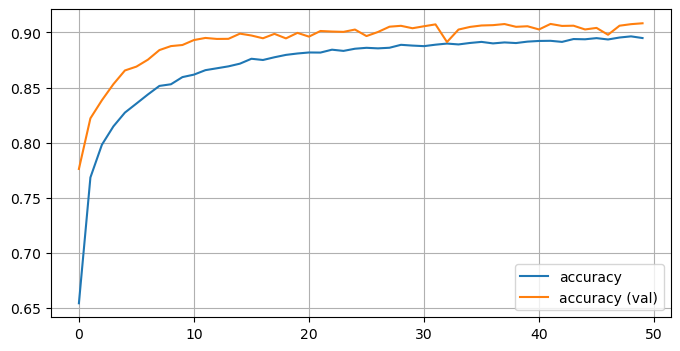

In [8]:
plt.figure(figsize=(8,4))
plt.plot((hist.history["loss"]),label="loss")
plt.plot((hist.history["val_loss"]),label="loss (val)")
plt.grid()
plt.legend()

plt.figure(figsize=(8,4))
plt.plot((hist.history["accuracy"]),label="accuracy")
plt.plot((hist.history["val_accuracy"]),label="accuracy (val)")
plt.grid()
plt.legend()